[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1CxFVk82NFVhdX9oXl03p7dEjK-lrGBcE?usp=sharing)

# **Week 3 - Introduction to Linear Kinetic Models**

## **Abstract**

1. **Brief Overview of LogP in Drug Design**: LogP's significance in drug design is briefly introduced, highlighting its impact on a drug's interaction with water and lipid environments. Additional resources are provided for students to explore this topic in depth.

2. **Simple Linear Regression for Predicting LogP**: Simple linear regression is presented as a method for modeling relationships between variables, specifically applied to predict LogP values. This approach illustrates the integration of statistical concepts in chemical analysis.

3. **Cross-Validation in Model Assessment**: K-fold cross-validation is explored as a robust technique for evaluating machine learning model performance, emphasizing its importance in reducing bias and ensuring comprehensive evaluation.

4. **Understanding RMSE and Lambda in Machine Learning**: RMSE and lambda are introduced as critical elements in machine learning. RMSE assesses model accuracy, while lambda, a regularization parameter, aids in preventing overfitting, thus enhancing model predictability.

5. **Practical Exercises and Applications**: Concluding with practical exercises, the module encourages applying concepts like Leave One Out (LOO) and K-fold cross-validation, using Scikit Learn's documentation. These exercises aim to solidify the students' understanding of model validation in practical scenarios.


## **References: Essential Resources for Further Learning**

1. **LogP — Making Sense of the Value**: [Research Paper](https://www.acdlabs.com/wp-content/uploads/download/app/physchem/making_sense.pdf)
2. **Machine Learning Models for predicting Lipophilicity (logP)**: [Research Paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8367913/)
3. **Scikit Learn Documentation**: [Official Documentation](https://scikit-learn.org/stable/index.html)
4. **The Kinetics of Binding to p38 MAP kinase by analogues of BIRB 796**: [Research Paper](https://www.sciencedirect.com/science/article/abs/pii/S0960894X03006565?via%3Dihub)

Feel free to explore these resources to deepen your understanding of data visualization, data management, and computational tools in Chemistry.

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold

import matplotlib
import matplotlib.pyplot as plt

# **Introduction to LogP and Its Importance in Drug Design**

**Lipophilicity**, quantified as **logP**, stands as a key indicator in the realm of drug design. Its significance stems from its ability to predict how a compound interacts with both water and lipid environments, which is crucial in understanding the absorption, distribution, metabolism, and excretion (ADME) properties of potential pharmaceuticals.

## **Understanding LogP**

**LogP** is a measure of a compound's distribution between **a hydrophilic (water) phase and a lipophilic (organic)** phase. Essentially, it quantifies the preference of a compound for either of these environments. This preference has profound implications in drug design, as it influences a drug’s ability to **reach its target in the body**.

<br>

<a href="https://www.nature.com/articles/s42004-021-00528-9" target="_blank">
  <img src="https://raw.githubusercontent.com/RodrigoAVargasHdz/CHEM-4PB3/main/Assests/logP%20Image%202.png" alt="Visualizing LogP" width="700">
</a>
<br>
</a>

[**Figure 1 - Illustrating Lipophilicity. Image by Rudra Sondhi & Dall-E 3(2023a)**](https://www.nature.com/articles/s42004-021-00528-9)

<br>

### **The Scale of LogP**

- **logP < 0**: A negative logP value indicates a compound with a higher affinity for the aqueous or water phase. Such compounds tend to be more hydrophilic.
- **logP > 0**: A positive logP value signifies a higher concentration in the lipid or organic phase, pointing towards more lipophilic properties.
- **logP = 0**: When logP equals zero, it implies that the compound is equally partitioned between the lipid and aqueous phases, suggesting a balanced lipophilicity and hydrophilicity.

<br>

## **Implications in Drug Design**

In drug design, logP serves as a critical parameter. It is a predictor of a drug's solubility and permeability, which are essential for its efficacy. A drug must be sufficiently lipophilic to cross cell membranes but not so lipophilic that it fails to be soluble in bodily fluids. Hence, understanding and predicting logP values aid in the optimization of these properties, ensuring that potential drugs have the right balance to be both effective and safe.

<br>

## **The Role of Regression Models**

Given its importance, accurately predicting logP values is a key task in pharmaceutical research. Regression models, which you will be exploring in this lesson, are powerful tools in achieving this. They enable the prediction of logP based on the molecular structure and other features of compounds, facilitating the early stages of drug design by identifying promising candidates and guiding modifications to existing molecules.

<br>

> As we delve into the practical aspects of using regression models for predicting logP, we not only engage with a fundamental concept in chemistry and pharmacology but also contribute to the broader endeavor of developing effective and safe pharmaceuticals.

<br>

---

> ## **External Resources & Important Research:**
* **LogP — Making Sense of the Value**: [Research Paper](https://www.acdlabs.com/wp-content/uploads/download/app/physchem/making_sense.pdf)
* **Exploring the octanol–water partition coefficient dataset using Deep Learning**: [Research Paper](https://numpy.org/doc/stable/reference/routines.linalg.html)
* **Machine Learning Models for predicting Lipophilicity (logP)**: [Research Paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8367913/)
* **Diffusion Models in Generative Chemistry for Drug Design**: [Article](https://medium.com/@cch57/exploring-the-promise-of-generative-models-in-chemistry-an-introduction-to-diffusion-models-31530e9d1dcb)

<br>

<p float="left">
  <a href="https://www.nature.com/articles/s42004-021-00528-9" target="_blank">
    <img src="https://media.springernature.com/m685/springer-static/image/art%3A10.1038%2Fs42004-021-00528-9/MediaObjects/42004_2021_528_Fig1_HTML.png" alt="Exploring the Octanol–Water Partition with Deep Learning Techniques" width="600">
  </a>
  <br>
  </a>

  [**Figure 2 - Exploring the Octanol–Water Partition with Deep Learning Techniques. Image by Ulrich et al.**](https://www.nature.com/articles/s42004-021-00528-9)

  <br>


  </a>

  </a>
</p>



---


# **Introduction to Linear Regression**

Linear regression is a fundamental technique in statistical modeling and machine learning, especially pertinent in fields like pharmaceutical research where understanding relationships between variables is crucial. At its core, linear regression involves predicting a dependent variable (outcome) based on one or more independent variables (predictors). The goal is to find a linear relationship, or a straight-line fit, that best describes the data.

## **The Concept of Linear Regression**

Imagine a scatter plot where each point represents a specific observation with a known outcome and predictor(s). Linear regression aims to draw a straight line through these points that minimizes the overall distance between the line and each point. This line is the "regression line", and it represents the best approximation of the underlying relationship.

## **The Mathematical Model**

Mathematically, in simple linear regression (with one predictor), this relationship is expressed as:

$$ y = \beta_0 + \beta_1x + \epsilon $$

Where:
- $y$ is the dependent variable.
- $x$ is the independent variable.
- $\beta_0$ is the y-intercept of the regression line.
- $\beta_1$ is the slope of the regression line.
- $\epsilon$ represents the error term, accounting for the variance in $y$ not explained by $x$.


### **Interpreting the Coefficients**

The coefficients ($\beta_0$ and $\beta_1$ in simple regression) are crucial. They tell us how much we expect the dependent variable to change as the independent variable(s) change. For instance, in the context of predicting logP, $\beta_1$ would indicate how much logP changes for a unit change in a molecular feature.


# **Predicting LogP with Linear Regression**

To initialize the Linear Regression Model, Python's Pandas library can be used to create and manipulate the dataset, ensuring it is structured appropriately for our modeling environment.


<br>

<a href="https://www.nature.com/articles/s42004-021-00528-9" target="_blank">
  <img src="https://raw.githubusercontent.com/RodrigoAVargasHdz/CHEM-4PB3/main/Assests/Week%204%20URL.png" alt="Week 4 Dataset URLP" width="700">
</a>
<br>
</a>



>### **References**
1. **The Kinetics of Binding to p38 MAP kinase by analogues of BIRB 796**: [Research Paper](https://www.sciencedirect.com/science/article/abs/pii/S0960894X03006565?via%3Dihub)
2. **Data Exploration and Linear Regression**: [Example Application](https://pandas.pydata.org/docs/)
3. **Cross-validation: Evaluating Estimator Performance**: [Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html)





In [2]:
#Load Data
data_url = 'https://kbbox.h-its.org/media/uploads/2017/11/15/map38.csv'
data = pd.read_csv(data_url)

# Display the first few rows of the DataFrame
data.head()

,compound_key,pKD,pkon,pkoff,vsa_positiv,vsa_negativ,lipophilicity,vsa_polar,weight
0,2,10.01,-4.93,5.08,369.66,183.17,4.94,147.38,527.67
1,3,5.92,-5.07,0.85,204.59,125.31,2.97,81.18,306.80
2,5,10.01,-5.19,4.82,342.38,193.22,4.64,147.38,513.64
3,6,8.23,-4.81,3.42,315.11,193.22,4.29,147.38,499.61
4,7,7.80,-4.40,3.40,371.93,190.94,3.74,180.42,543.67


> Since we are trying to predict logP, the relevant data can be seperated and stored.

In [3]:
y = data['lipophilicity'].to_numpy()
X = data.drop(['compound_key', 'lipophilicity'],axis=1).to_numpy()
print('Data dimensions: ',X.shape)

Data dimensions:  (16, 7)


> Since the data has been organized, we can now split our data and train it using the [`Scikit-Learn`](https://scikit-learn.org/stable/) library.



In [4]:
# Split Training and Validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

> The code is segmenting the dataset into two parts: one for training the model (the training set) and another to evaluate its performance (the validation set), ensuring that the model can generalize well to new, unseen data.


In [5]:
# Defining the Model Solver Function:
def linear_model_solver(data, deg, l):
    X, y = data
    poly = PolynomialFeatures(deg)
    Phi = poly.fit_transform(X)
    Phit_Phi = Phi.T @ Phi
    Phit_y = Phi.T @ y
    lambda_I = l*np.eye(Phit_Phi.shape[0])  # Regularization
    A = Phit_Phi + lambda_I
    A_inv = np.linalg.inv(A)
    w = A_inv @ Phit_y
    return w

> ### **Explanation:**
- **Polynomial Transformation**: Upgrades the data to include not just the original features but also their higher powers up to the degree specified by 'deg', allowing for a curve, not just a line, to fit the data.
- **Incorporates Regularization**: Adds a penalty for more complex curves, controlled by **'lambda'**, which helps to prevent the model from overfitting by smoothing out the curve.
- **Computes Coefficients**: Uses linear algebra to calculate the set of weights, or coefficients, that best align the polynomial curve to the data points, accounting for the regularization effect.
- **Returns Optimized Weights**: Outputs the final weights after balancing the fit and complexity, which can then be used to make predictions.

<br>

<a href="https://neuraspike.com/blog/l2-regularization-with-python/" target="_blank">
  <img src="https://neuraspike.com/wp-content/uploads/2020/10/l2-regularization-with-python-thumbnail.gif" alt="Regularization with Python" width="600">
</a>
<br>
</a>

[**Figure 3 - Regularization with Python. Image by David Praise Chukwuma Kalu**](https://neuraspike.com/blog/l2-regularization-with-python/)

<br>

In [6]:
# Prediction Function:
def f_poly(X, w, deg):
    poly = PolynomialFeatures(deg)
    Phi = poly.fit_transform(X)
    y_pred = Phi @ w
    return y_pred

# Root Mean Square Error (RMSE) Calculation:
def f_rmse(y_true, y_pred):
    z = (y_true - y_pred)**2
    return np.sqrt(np.mean(z))


> [**Learn More:**](https://help.sap.com/docs/SAP_PREDICTIVE_ANALYTICS/41d1a6d4e7574e32b815f1cc87c00f42/5e5198fd4afe4ae5b48fefe0d3161810.html) **The Root Mean Squared Error (RMSE)** measures the average difference between values predicted by a model and the actual values.





In [7]:
data = (X_train, y_train)
data_val = (X_val, y_val)
deg = 2
l_ = np.exp(np.linspace(-6., 0, 10))
l_ = np.sort(np.append(l_, 0.))

# Initialize a DataFrame to store the regularization parameters and RMSE values
results_df = pd.DataFrame(columns=['Lambda', 'RMSE'])

# Iterate over the regularization parameters to train the model and calculate RMSE
for l in l_:
    w = linear_model_solver(data, deg, l)
    y_val_pred = f_poly(X_val, w, deg)
    rmse = f_rmse(y_val, y_val_pred)
    # Create a new DataFrame from the dictionary for the current row and concat it
    new_row = pd.DataFrame({'Lambda': [l], 'RMSE': [rmse]})
    results_df = pd.concat([results_df, new_row], ignore_index=True)

# Set the 'Lambda' column as the index for prettier display
results_df.set_index('Lambda', inplace=True)

# Display the table
display(results_df)


,RMSE
Lambda,
0.000000,79.444729
0.002479,2.288619
0.004828,2.279624
0.009404,2.282168
0.018316,2.287072
0.035674,2.282668
0.069483,2.284101
0.135335,2.282218
0.263597,2.282912


> *   **RMSE Trends:** This means that as the model is made more restrictive (by increasing Lambda to avoid overfitting), the average prediction error (RMSE) doesn't change much.
*   **Increasing Lambda:** Increasing Lambda imposes a stricter penalty on larger model weights, promoting simpler model structures that potentially generalize better to unseen data. However, the model may underfit if the penalty is too strong.



<ipython-input-9-e9ce26260d13>:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(np.log(l_for_plotting), rmse_for_plotting, 'o-', ms=8, marker='o')


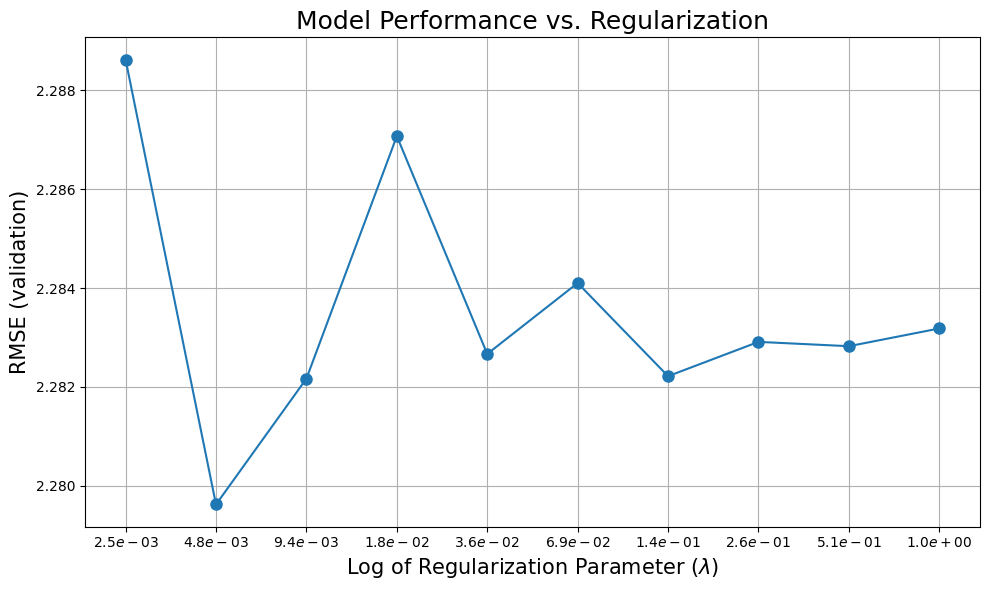

In [9]:
# Extract the RMSE values for non-zero lambdas
l_for_plotting = l_[l_ > 0]
rmse_for_plotting = results_df.loc[l_for_plotting, 'RMSE']

plt.figure(figsize=(10, 6))
plt.plot(np.log(l_for_plotting), rmse_for_plotting, 'o-', ms=8, marker='o')

# Update the lambda ticks for the plot
lambda_ticks = [f'${x:.1e}$' for x in l_for_plotting]
plt.xticks(np.log(l_for_plotting), lambda_ticks)

plt.ylabel('RMSE (validation)', fontsize=15)
plt.xlabel(r'Log of Regularization Parameter ($\lambda$)', fontsize=15)
plt.title('Model Performance vs. Regularization', fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.show()


## **Cross-Validation: K-fold Cross-Validation**

**K-fold cross-validation** is a robust method for assessing the performance of machine learning models. It reduces bias by using different portions of the data to test and train the model in \( K \) iterations.

- **K Folds**: Divides the dataset into \( K \) equal parts.
- **Train/Test**: Each fold acts as a test set once, and as part of the training set \( K-1 \) times.
- **Performance**: Model performance is assessed \( K \) times, each time with a different training and test set.
- **Average Result**: The \( K \) performance scores are averaged to provide an overall model performance metric.



In [10]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
deg = 2  # degree of the polynomial for the model
l = 0.01  # regularization parameter

# Store the average RMSE for each fold
average_rmse = []

for train_index, val_index in kf.split(X):
    X_train, y_train = X[train_index], y[train_index]
    X_val, y_val = X[val_index], y[val_index]

    # Train the model using the training set for the current fold
    w = linear_model_solver((X_train, y_train), deg, l)

    # Evaluate the model using the validation set for the current fold
    y_val_pred = f_poly(X_val, w, deg)
    rmse = f_rmse(y_val, y_val_pred)

    average_rmse.append(rmse)

# Calculate the final average RMSE across all folds
final_average_rmse = sum(average_rmse) / len(average_rmse)
print(f'Final Average RMSE from K-Fold Cross-Validation: {final_average_rmse}')


Final Average RMSE from K-Fold Cross-Validation: 2.0058117728593436


## **Exercises**

1. **Leave One Out (LOO)**: Use [Scikit Learn's](https://scikit-learn.org/stable/index.html) documentation to cross-validate the model using **Leave One Out (LOO)** validation.
2. **Try your own**: Use [Scikit Learn's Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html#k-fold) functions to validate the model.

In [ ]:
#Leave One Out (LOO)



In [13]:
# Try your own



Average RMSE from cross-validation: 3.1743845519608618
